In [16]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import PokemonUtils as pkmnUtils
importlib.reload(pkmnUtils)  # update import if PokemonUtils.py changes
utils = pkmnUtils.PokemonUtils()

In [2]:
# Collect list of all gifs (takes ~5 minutes)
all_gifs = []
count = 1;
for name in utils.uniqueValidPokemonNames:
    gif = utils.readGif(name)
    all_gifs.append(gif)
    if count % 25 == 0:
        print(count, "done!")
    count += 1
print("all", count-1, "done!")

25 done!
50 done!
75 done!
100 done!
125 done!
150 done!
175 done!
200 done!
225 done!
250 done!
275 done!
300 done!
325 done!
350 done!
375 done!
400 done!
425 done!
450 done!
475 done!
500 done!
525 done!
550 done!
575 done!
600 done!
625 done!
650 done!
675 done!
700 done!
725 done!
750 done!
775 done!
800 done!
825 done!
850 done!
875 done!
900 done!
925 done!
942 done!


In [34]:
# Find distribution of data sizes
smallest = np.array([999,999,999,999])
largest  = np.array([-1,-1,-1,-1])
for i in range(len(all_gifs)):
    gif = all_gifs[i]
    cur = np.array([gif.shape[0], gif.shape[1], gif.shape[2], gif.shape[3]])
    if (gif.shape[0] <= 1):
        print(utils.numberToName(utils.uniqueValidIDs[i]), "had only 1 frame")
        continue
    smallest = np.minimum(cur, smallest)
    largest  = np.maximum(cur, largest)
print("smallest:", smallest)
print("largest:", largest)

ferroseed had only 1 frame
komala had only 1 frame
darmanitan-zen had only 1 frame
smallest: [14 15 29  4]
largest: [299 188 234   4]


Text(0.5,1,'Widths')

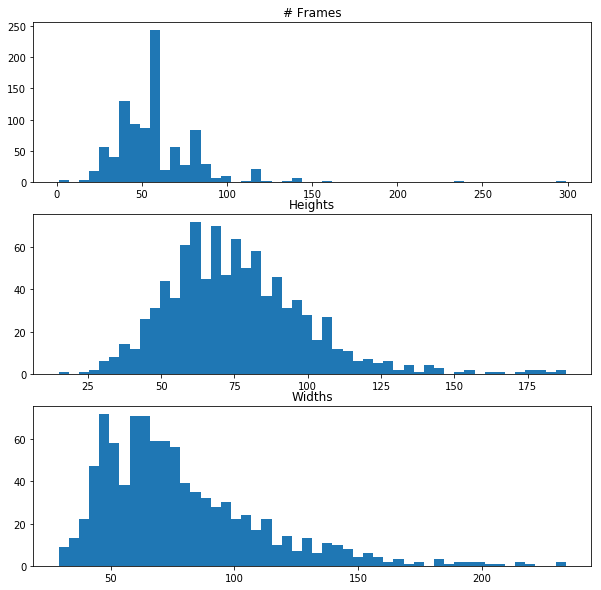

In [35]:
T = []
H = []
W = []
for gif in all_gifs:
    T.append(gif.shape[0])
    H.append(gif.shape[1])
    W.append(gif.shape[2])

plt.rcParams['figure.figsize'] = [10, 10]
f, axarr = plt.subplots(3)
axarr[0].hist(T, 50)
axarr[0].set_title("# Frames")
axarr[1].hist(H, 50)
axarr[1].set_title("Heights")
axarr[2].hist(W, 50)
axarr[2].set_title("Widths")

In [37]:
# Make x_train, x_val, and x_test from first frame of every gif
# Shapes: (N, H, W, C)
x_train = np.zeros((utils.x_train_inds.shape[0], largest[1], largest[2], largest[3]), dtype='uint8')
x_val   = np.zeros((utils.x_val_inds.shape[0],   largest[1], largest[2], largest[3]), dtype='uint8')
x_test  = np.zeros((utils.x_test_inds.shape[0],  largest[1], largest[2], largest[3]), dtype='uint8')

mats = (x_train, x_val, x_test)
inds = (utils.x_train_inds, utils.x_val_inds, utils.x_test_inds)
for i in range(3):
    for n in range(mats[i].shape[0]):
        frame = all_gifs[inds[i][n]][0,:,:,:]
        h_diff = largest[1] - frame.shape[0]
        w_diff = largest[2] - frame.shape[1]
        h0 = h_diff//2
        h1 = h_diff//2 + h_diff%2
        w0 = w_diff//2
        w1 = w_diff//2 + w_diff%2
        padded = np.pad(frame, ((h0,h1),(w0,w1),(0,0)), 'constant')  # Centered on transparent bkgd
        mats[i][n,:,:,:] = padded

print("x_train:", x_train.shape)
print("x_val:  ", x_val.shape)
print("x_test: ", x_test.shape)

x_train: (602, 188, 234, 4)
x_val:   (151, 188, 234, 4)
x_test:  (189, 188, 234, 4)


In [38]:
# Grab y_train, y_val, and y_test from utils
# Shapes: (N,)
y_train = utils.y_train
y_val   = utils.y_val
y_test  = utils.y_test

print("y_train:", y_train.shape)
print("y_val:  ", y_val.shape)
print("y_test: ", y_test.shape)

y_train: (602,)
y_val:   (151,)
y_test:  (189,)


type: fighting


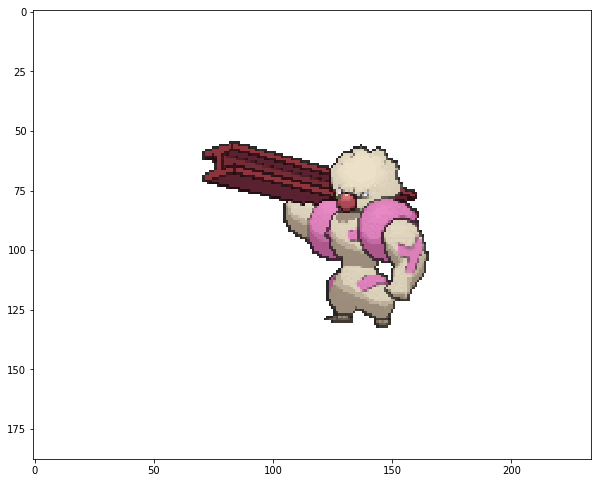

In [39]:
# Example (x,y) pair
plt.imshow(x_train[0,:,:,:])
print("type:",utils.typeToName(y_train[0]))